# Raissa Anggia Maharani
# 2206048581
# Komputasi Intelegensia

Import Modul yang Dibutuhkan

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

Load Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/revitsone-5class")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1


In [ ]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities"):
    if other.endswith(".png") or other.endswith(".jpg"):
        image_list_other.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities",
                                             other))
        print(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities", other))

for safe in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/safe_driving"):
    if safe.endswith(".png") or safe.endswith(".jpg"):
        image_list_safe.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/safe_driving",
                                            safe))
        print(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/safe_driving",
                           safe))

for talking in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone"):
    if talking.endswith(".png") or talking.endswith(".jpg"):
        image_list_talking.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone",
                                               talking))
        print(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone",
                           talking))

for text in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone"):
    if text.endswith(".png") or text.endswith(".jpg"):
        image_list_text.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone",
                                            text))
        print(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone",
                           text))

for turn in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning"):
    if turn.endswith(".png") or turn.endswith(".jpg"):
        image_list_turn.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning",
                                            turn))
        print(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning",
                           turn))



Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_40534.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_22464.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_43424.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_22931.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_19789.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_30565.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_38417.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone/img_25667.jpg
/root/.cache/

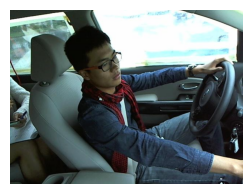

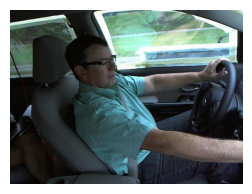

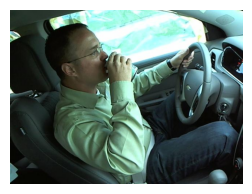

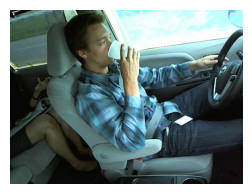

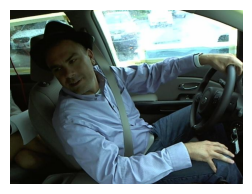

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tampilkan beberapa gambar pertama dari list image_list_other
num_images_to_show = 5  # Misalnya, tampilkan 5 gambar pertama
for i in range(min(num_images_to_show, len(image_list_other))):  # Pastikan tidak melebihi panjang list
    img_path = image_list_other[i]
    img = mpimg.imread(img_path)

    # Menampilkan gambar
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis('off')  # Matikan axis untuk tampilan yang lebih bersih
    plt.show()


# Pre-Modeling

Delete Unreadable Images

In [ ]:
from PIL import Image
import os

def find_and_delete_unreadable_images(image_list):
    valid_images = []
    deleted_images = []  # List untuk mencatat file yang dihapus

    for img_path in image_list:
        try:
            # Coba buka gambar
            with Image.open(img_path) as img:
                img.verify()  # Verifikasi apakah file adalah gambar valid
            valid_images.append(img_path)  # Tambahkan gambar valid ke daftar
        except (IOError, SyntaxError):
            print(f"Unreadable image: {img_path}")
            deleted_images.append(img_path)  # Catat file yang tidak valid
            os.remove(img_path)  # Hapus file yang tidak terbaca

    return valid_images, deleted_images

# Contoh penggunaan: Periksa dan catat file yang dihapus untuk kategori lain
image_list_other, deleted_images_other = find_and_delete_unreadable_images(image_list_other)
image_list_safe, deleted_images_safe = find_and_delete_unreadable_images(image_list_safe)
image_list_talking, deleted_images_talking = find_and_delete_unreadable_images(image_list_talking)
image_list_text, deleted_images_text = find_and_delete_unreadable_images(image_list_text)
image_list_turn, deleted_images_turn = find_and_delete_unreadable_images(image_list_turn)

# Gabungkan semua file yang dihapus dari semua kategori
all_deleted_images = (
    deleted_images_other +
    deleted_images_safe +
    deleted_images_talking +
    deleted_images_text +
    deleted_images_turn
)

print("Daftar semua file yang dihapus:")
for deleted_img in all_deleted_images:
    print(deleted_img)


Daftar semua file yang dihapus:


In [ ]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

Show Data

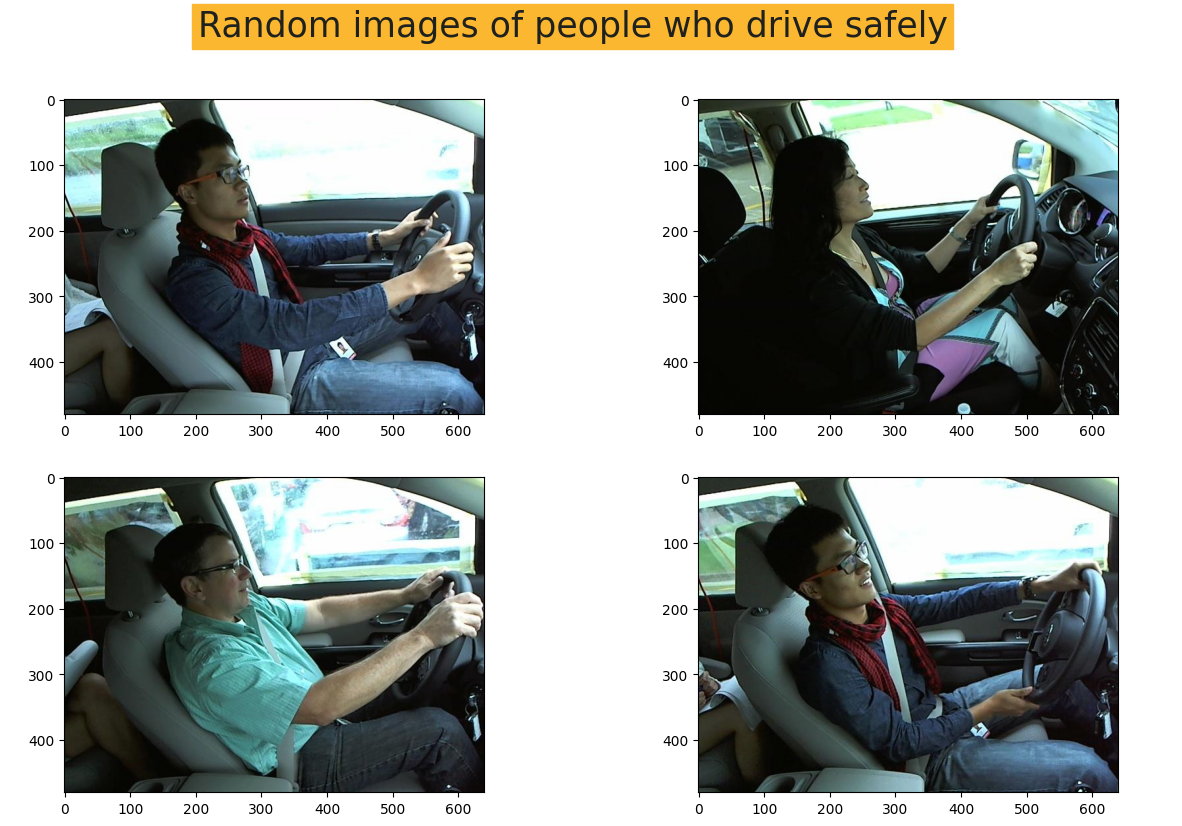

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

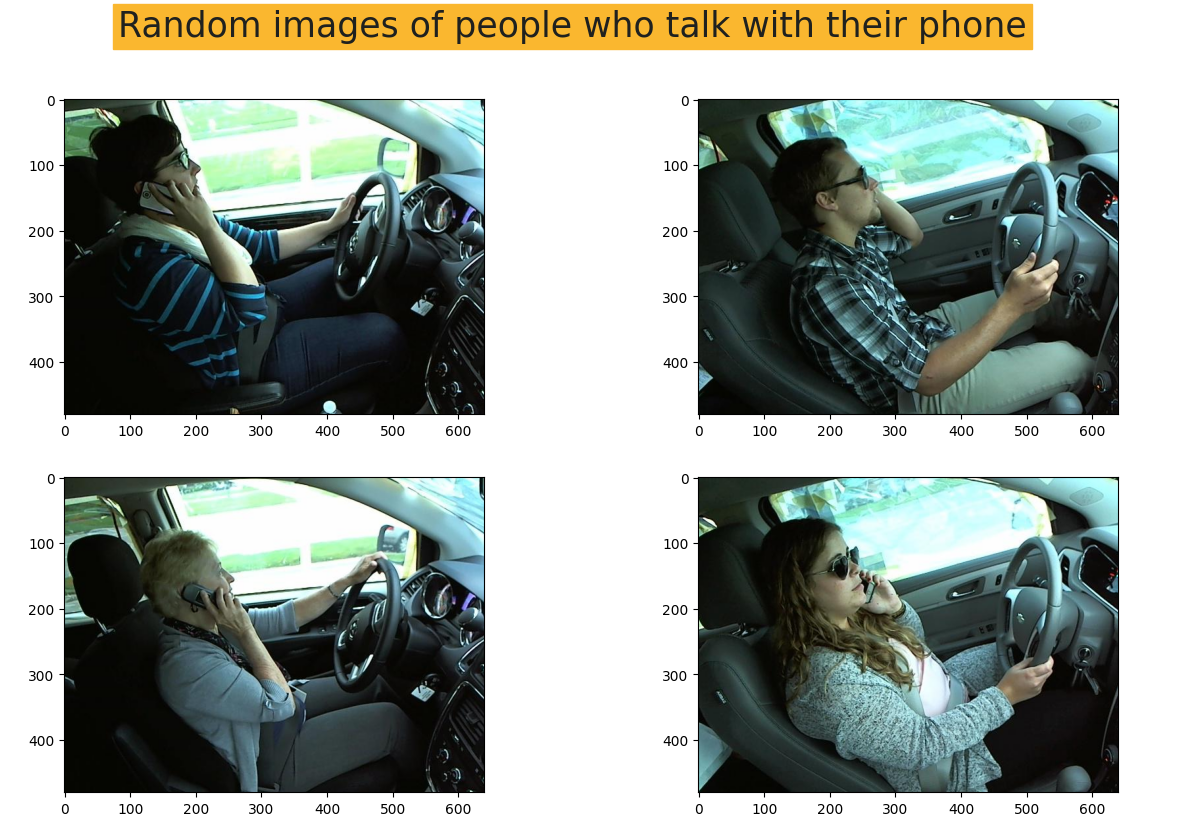

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

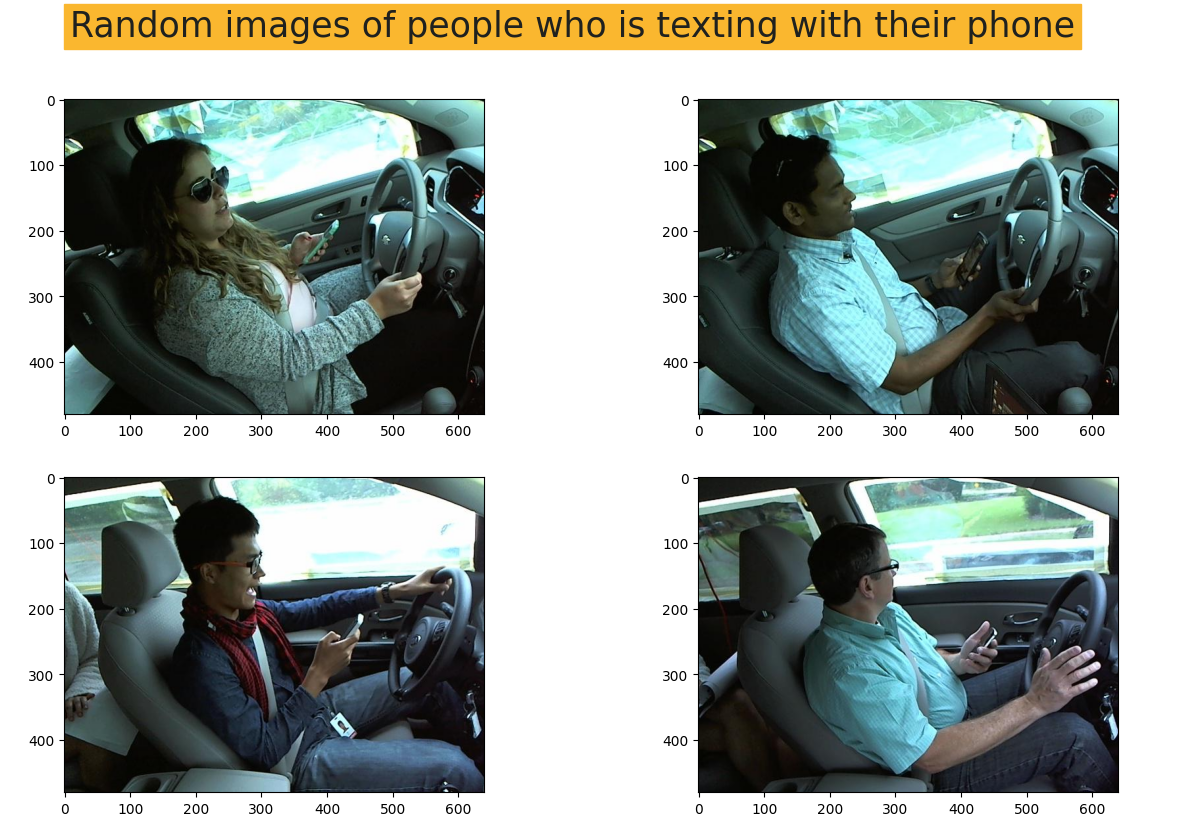

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who is texting with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

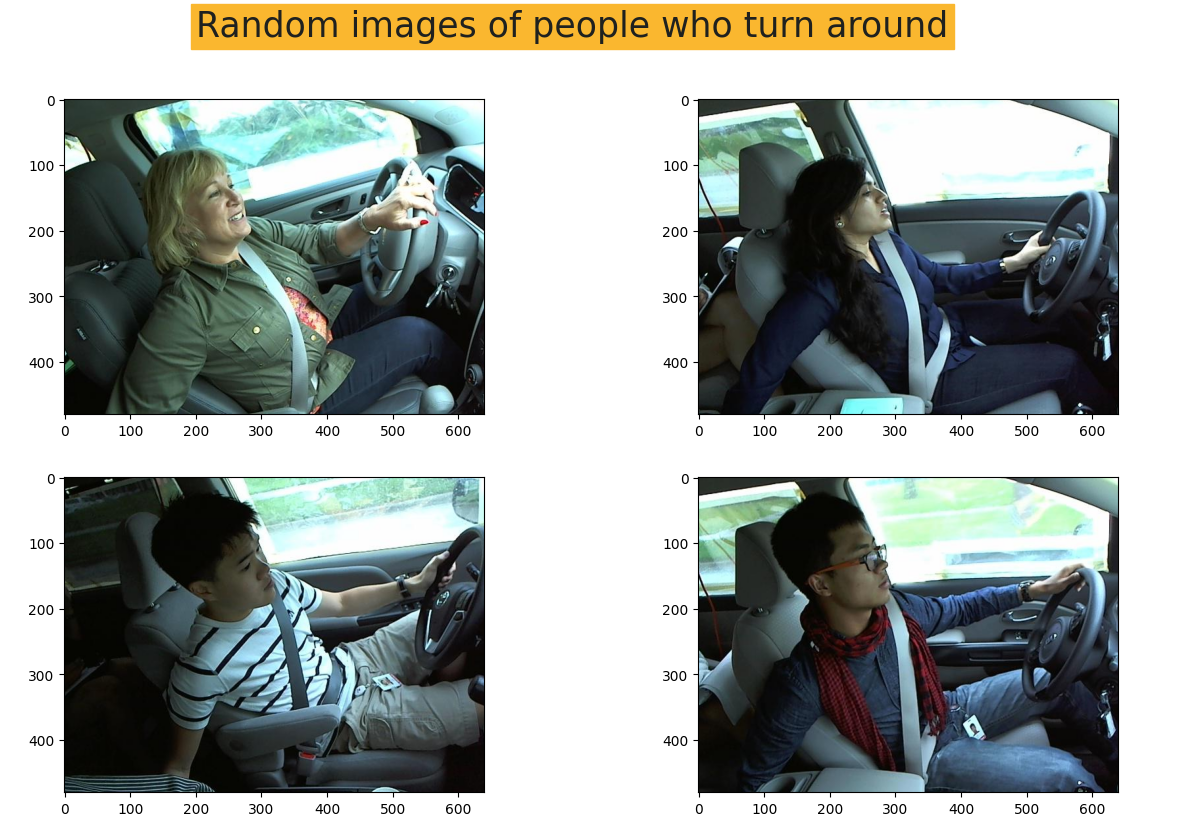

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

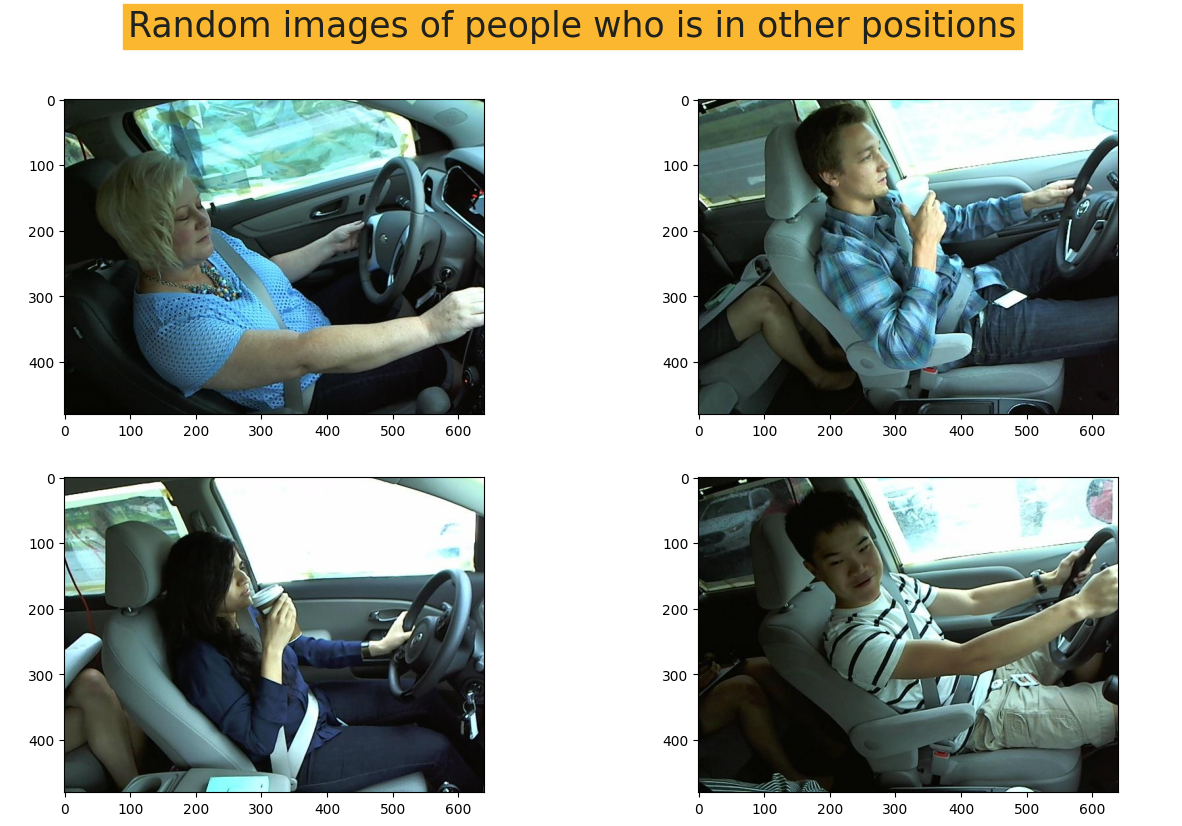

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who is in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

Split Data to Train Test

In [ ]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2119
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2057


In [ ]:
print("Number of Data Training in (Class = Other)",.75*len(image_list_other))
print("Number of Data Testing in (Class = Other)",.2*len(image_list_other))
print("Number of Data Validation in (Class = Other)",.05*len(image_list_other))
print("Number of Data Training in (Class = Safe Driving)",.75*len(image_list_safe))
print("Number of Data Testing in (Class = Safe Driving)",.2*len(image_list_safe))
print("Number of Data Validation in (Class = Safe Driving)",.05*len(image_list_safe))
print("Number of Data Training in (Class = Talking Phone)",.75*len(image_list_talking))
print("Number of Data Testing in (Class = Talking Phone)",.2*len(image_list_talking))
print("Number of Data Validation in (Class = Talking Phone)",.05*len(image_list_talking))
print("Number of Data Training in (Class = Texting Phone)",.75*len(image_list_text)) ,
print("Number of Data Testing in (Class = Texting Phone)",.2*len(image_list_text))
print("Number of Data Validation in (Class = Texting Phone)",.05*len(image_list_text))
print("Number of Data Training in (Class = Turning)",.75*len(image_list_turn))
print("Number of Data Testing in (Class = Turning)",.2*len(image_list_turn))
print("Number of Data Validation in (Class = Turning)",.05*len(image_list_turn))

Number of Data Training in (Class = Other) 1589.25
Number of Data Testing in (Class = Other) 423.8
Number of Data Validation in (Class = Other) 105.95
Number of Data Training in (Class = Safe Driving) 1652.25
Number of Data Testing in (Class = Safe Driving) 440.6
Number of Data Validation in (Class = Safe Driving) 110.15
Number of Data Training in (Class = Talking Phone) 1626.75
Number of Data Testing in (Class = Talking Phone) 433.8
Number of Data Validation in (Class = Talking Phone) 108.45
Number of Data Training in (Class = Texting Phone) 1652.25
Number of Data Testing in (Class = Texting Phone) 440.6
Number of Data Validation in (Class = Texting Phone) 110.15
Number of Data Training in (Class = Turning) 1542.75
Number of Data Testing in (Class = Turning) 411.40000000000003
Number of Data Validation in (Class = Turning) 102.85000000000001


In [ ]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
1589 423 107
1652 440 111
1626 433 110
1652 440 111
1547 412 98


In [ ]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [ ]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [ ]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [ ]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [ ]:
train_df.head()

image  label
0  /root/.cache/kagglehub/datasets/robinreni/revi...  Other
1  /root/.cache/kagglehub/datasets/robinreni/revi...  Other
2  /root/.cache/kagglehub/datasets/robinreni/revi...  Other
3  /root/.cache/kagglehub/datasets/robinreni/revi...  Other
4  /root/.cache/kagglehub/datasets/robinreni/revi...  Other

In [ ]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2148
Number of rows in val dataframe is:  537


In [ ]:
random_img_height = random.choice(train_other)

In [ ]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [ ]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8066 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 537 validated image filenames belonging to 5 classes.


Modelling

In [ ]:
def SimpleCNN1():
    inp = layers.Input((240, 240, 3))

    # Block 1
    x = layers.Conv2D(8, 3, padding='same', activation='relu')(inp)
    x = layers.MaxPooling2D(2, 2)(x)

    # Block 2
    x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    # Model definition
    model_CNN1 = models.Model(inputs=inp, outputs=x)
    return model_CNN1

In [ ]:
model_CNN1 = SimpleCNN1()
model_CNN1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 240, 240, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 120, 120, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,688,181 (14.07 MB)

 Trainable params: 3,688,181 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

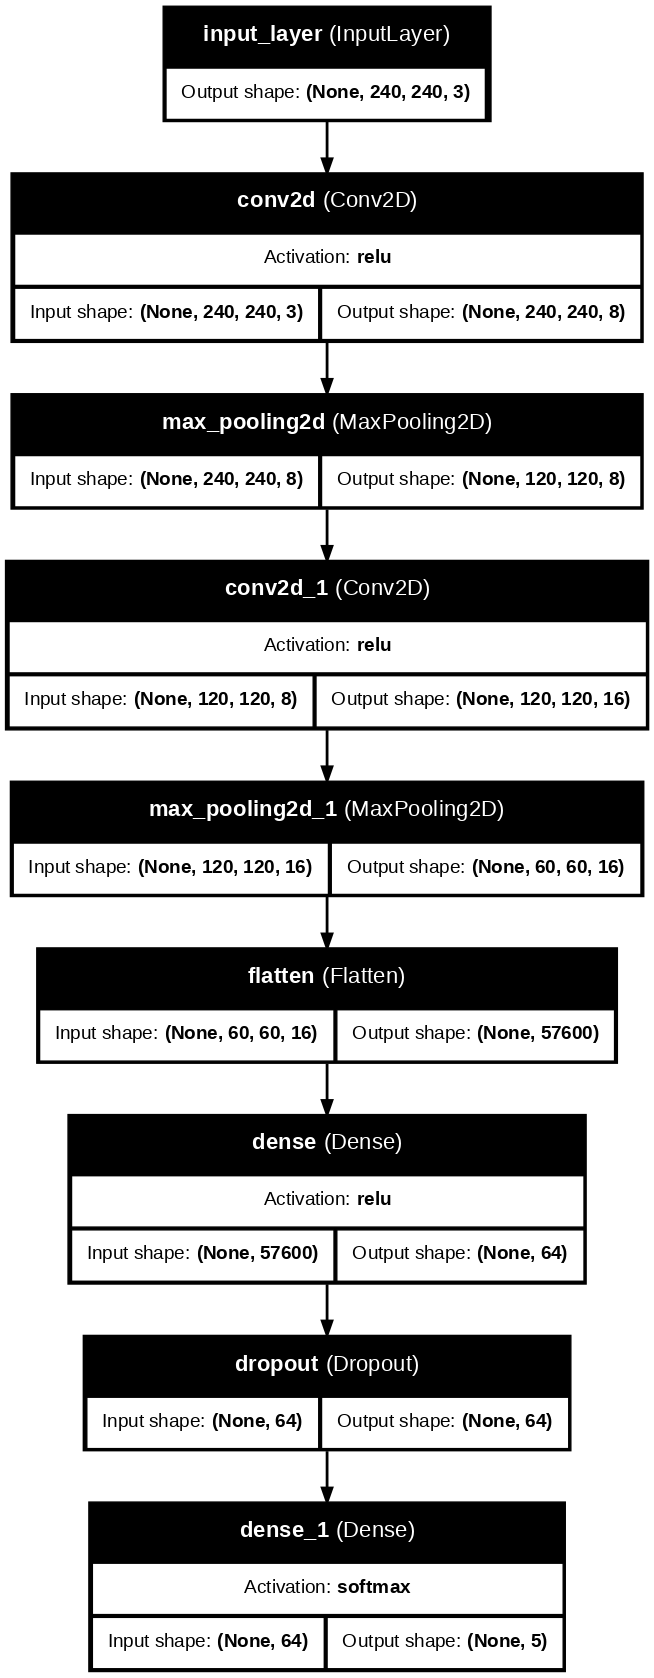

In [ ]:
tf.keras.utils.plot_model(
    model_CNN1,
    to_file='cnn_model1.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100)

In [ ]:
model_CNN1.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
CNN_model1 = model_CNN1.fit(trainDataset, epochs=10, validation_data=valDataset)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 277ms/step - accuracy: 0.2246 - loss: 2.2782 - val_accuracy: 0.2682 - val_loss: 1.5846
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 32s 242ms/step - accuracy: 0.2644 - loss: 1.5275 - val_accuracy: 0.3855 - val_loss: 1.4007
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 0.2873 - loss: 1.4604 - val_accuracy: 0.4171 - val_loss: 1.2963
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.2912 - loss: 1.4353 - val_accuracy: 0.5196 - val_loss: 1.2787
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.3074 - loss: 1.4184 - val_accuracy: 0.5382 - val_loss: 1.2171
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 32s 241ms/step - accuracy: 0.3113 - loss: 1.3841 - val_accuracy: 0.5400 - val_loss: 1.2051
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.3314 - loss: 1.3706 - val_accuracy: 0.5587 - val_loss: 1.1695
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 249ms/step - accuracy: 0.3330 - loss: 1

Evaluasi Model CNN

In [ ]:
training_loss_CNN1 = CNN_model1.history['loss']
val_loss_CNN1 = CNN_model1.history['val_loss']
training_acc_CNN1 = CNN_model1.history['accuracy']
val_acc_CNN1 = CNN_model1.history['val_accuracy']
epoch_count1a = np.arange(1, len(training_loss_CNN1) + 1)
epoch_count1b = np.arange(1, len(training_acc_CNN1) + 1)

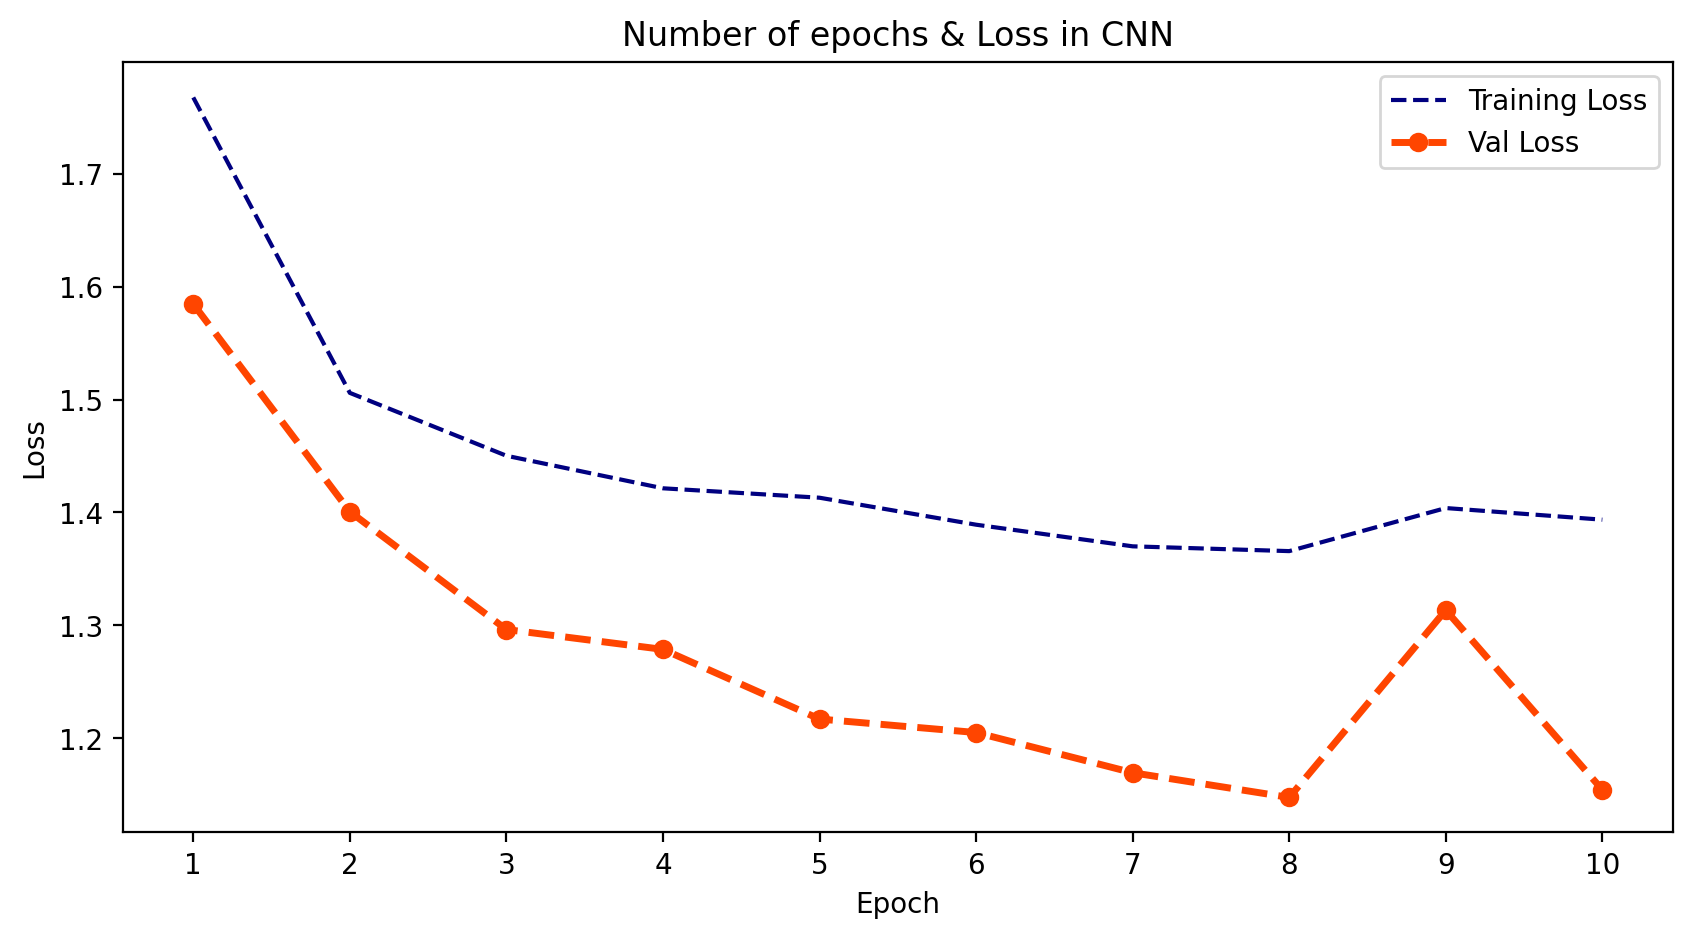

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count1a, training_loss_CNN1, 'r--', color= 'navy')
plt.plot(epoch_count1a, val_loss_CNN1, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,11,1))
plt.show();

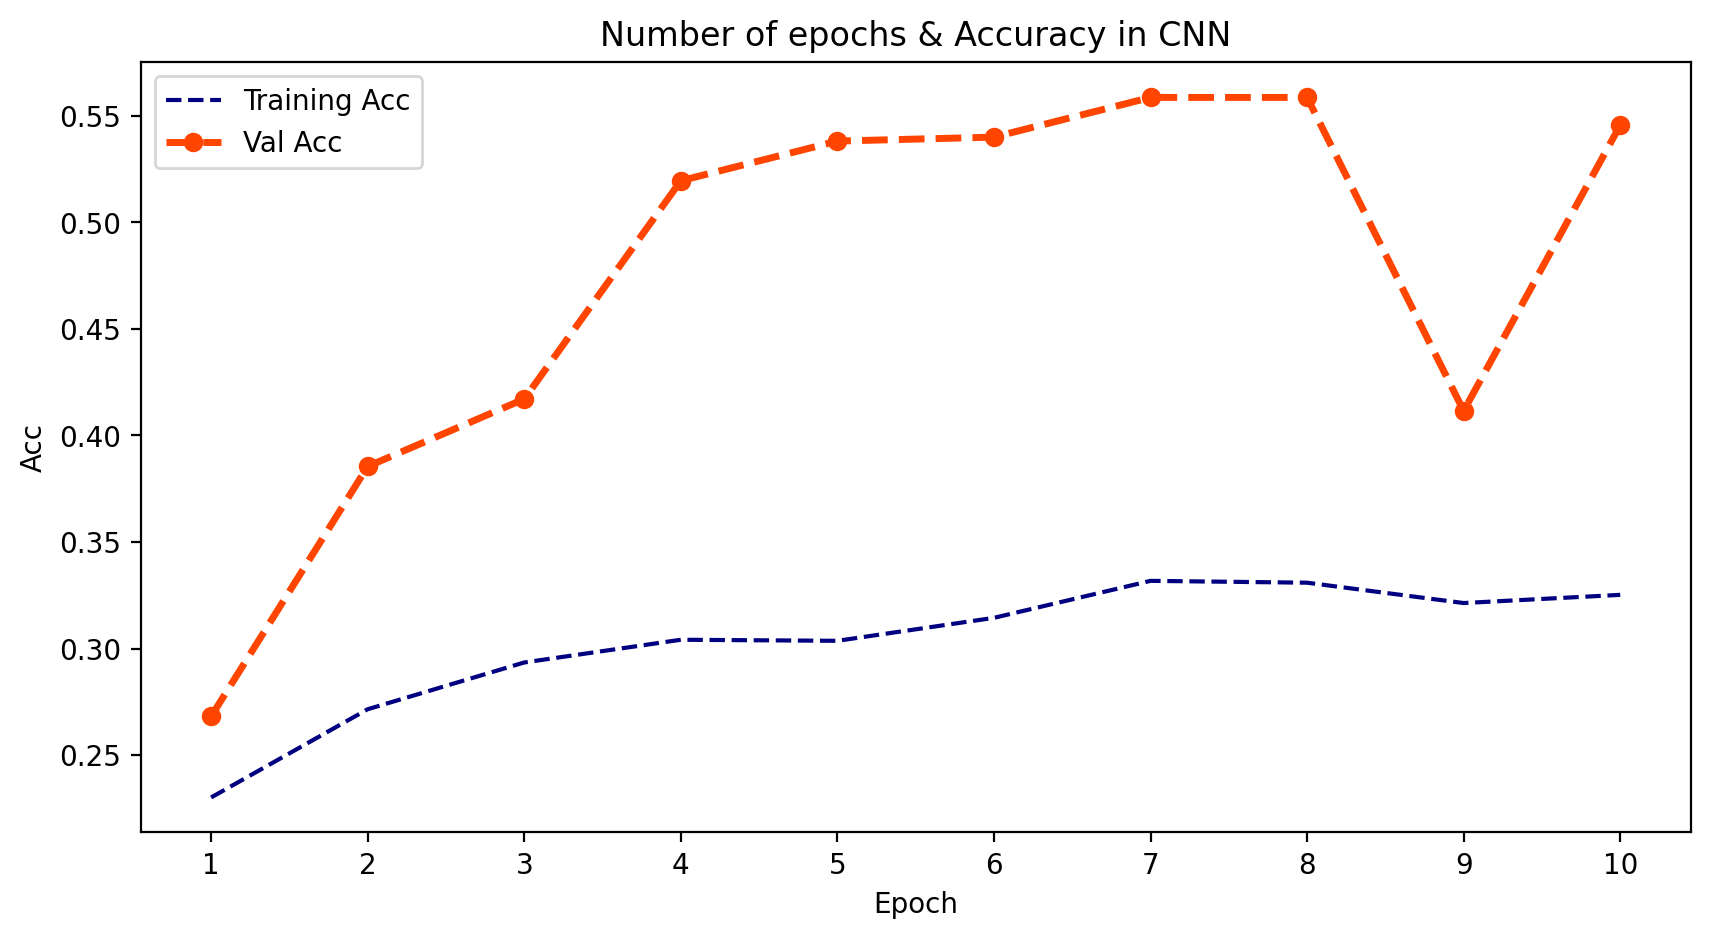

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count1b, training_acc_CNN1, 'r--', color= 'navy')
plt.plot(epoch_count1b, val_acc_CNN1, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in CNN')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

Modelling CNN yang Sudah Diimprovisasi

In [ ]:
def SimpleCNN2():
    inp = layers.Input((240, 240, 3))

    # Block 1
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inp)
    x = layers.MaxPooling2D(2, 2)(x)

    # Block 2
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    # Block 3
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    # Model definition
    model_CNN2 = models.Model(inputs=inp, outputs=x)
    return model_CNN2


In [ ]:
model_CNN2 = SimpleCNN2()
model_CNN2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 240, 240, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 120, 120, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,585,989 (112.86 MB)

 Trainable params: 29,585,989 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

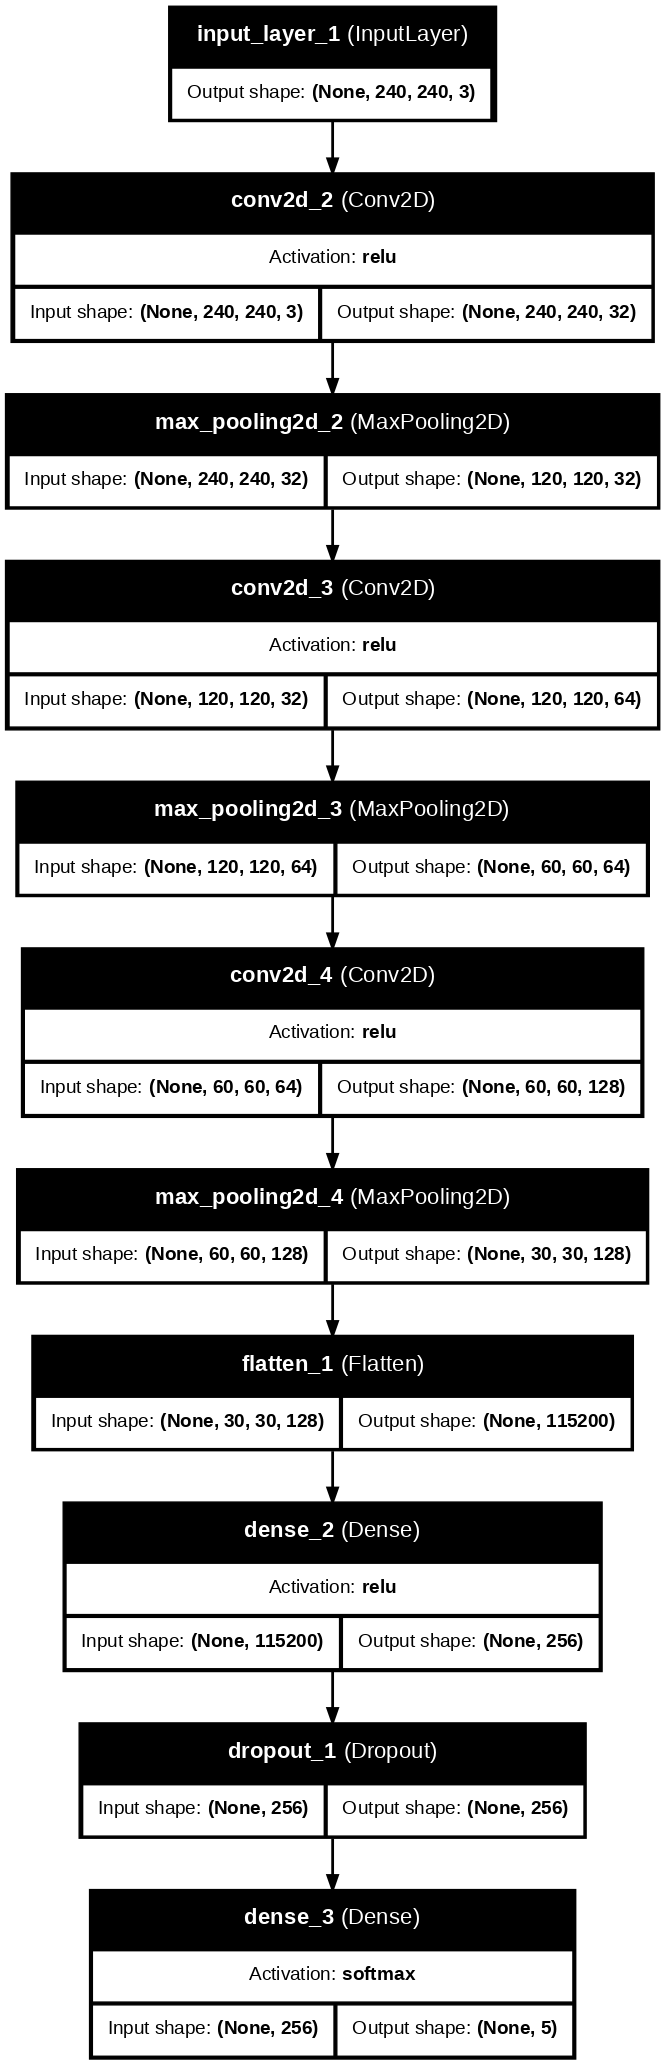

In [ ]:
tf.keras.utils.plot_model(
    model_CNN2,
    to_file='cnn_model2.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_CNN2.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
CNN_model2 = model_CNN2.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 53s 323ms/step - accuracy: 0.3856 - loss: 1.6763 - val_accuracy: 0.9125 - val_loss: 0.3096
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 269ms/step - accuracy: 0.8629 - loss: 0.3834 - val_accuracy: 0.9665 - val_loss: 0.1010
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - accuracy: 0.9404 - loss: 0.1720 - val_accuracy: 0.9721 - val_loss: 0.0826
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 263ms/step - accuracy: 0.9485 - loss: 0.1525 - val_accuracy: 0.9777 - val_loss: 0.0690
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 36s 263ms/step - accuracy: 0.9659 - loss: 0.0979 - val_accuracy: 0.9795 - val_loss: 0.0651
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 263ms/step - accuracy: 0.9761 - loss: 0.0670 - val_accuracy: 0.9814 - val_loss: 0.0603
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 272ms/step - accuracy: 0.9774 - loss: 0.0606 - val_accuracy: 0.9814 - val_loss: 0.0469
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 36s 263ms/step - accuracy: 0.9804 - loss: 0

Evaluasi Model CNN yang Sudah Diimprovisasi

In [ ]:
training_loss_CNN2 = CNN_model2.history['loss']
val_loss_CNN2 = CNN_model2.history['val_loss']
training_acc_CNN2 = CNN_model2.history['accuracy']
val_acc_CNN2 = CNN_model2.history['val_accuracy']
epoch_count2a = np.arange(1, len(training_loss_CNN2) + 1)
epoch_count2b = np.arange(1, len(training_acc_CNN2) + 1)

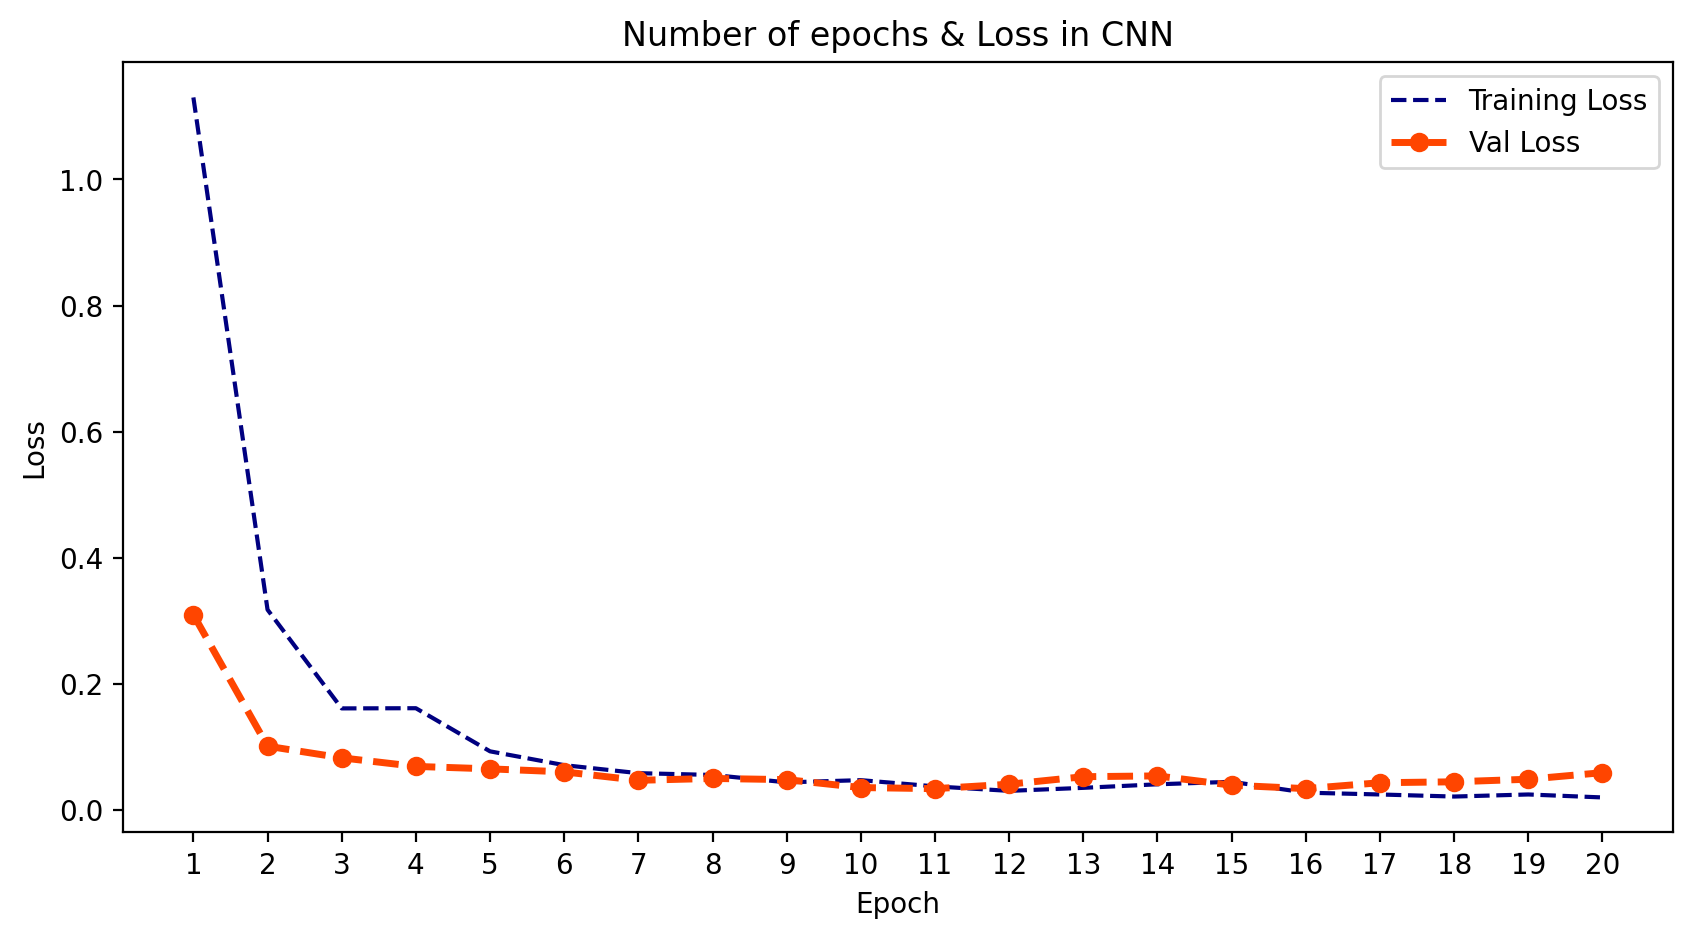

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count2a, training_loss_CNN2, 'r--', color= 'navy')
plt.plot(epoch_count2a, val_loss_CNN2, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

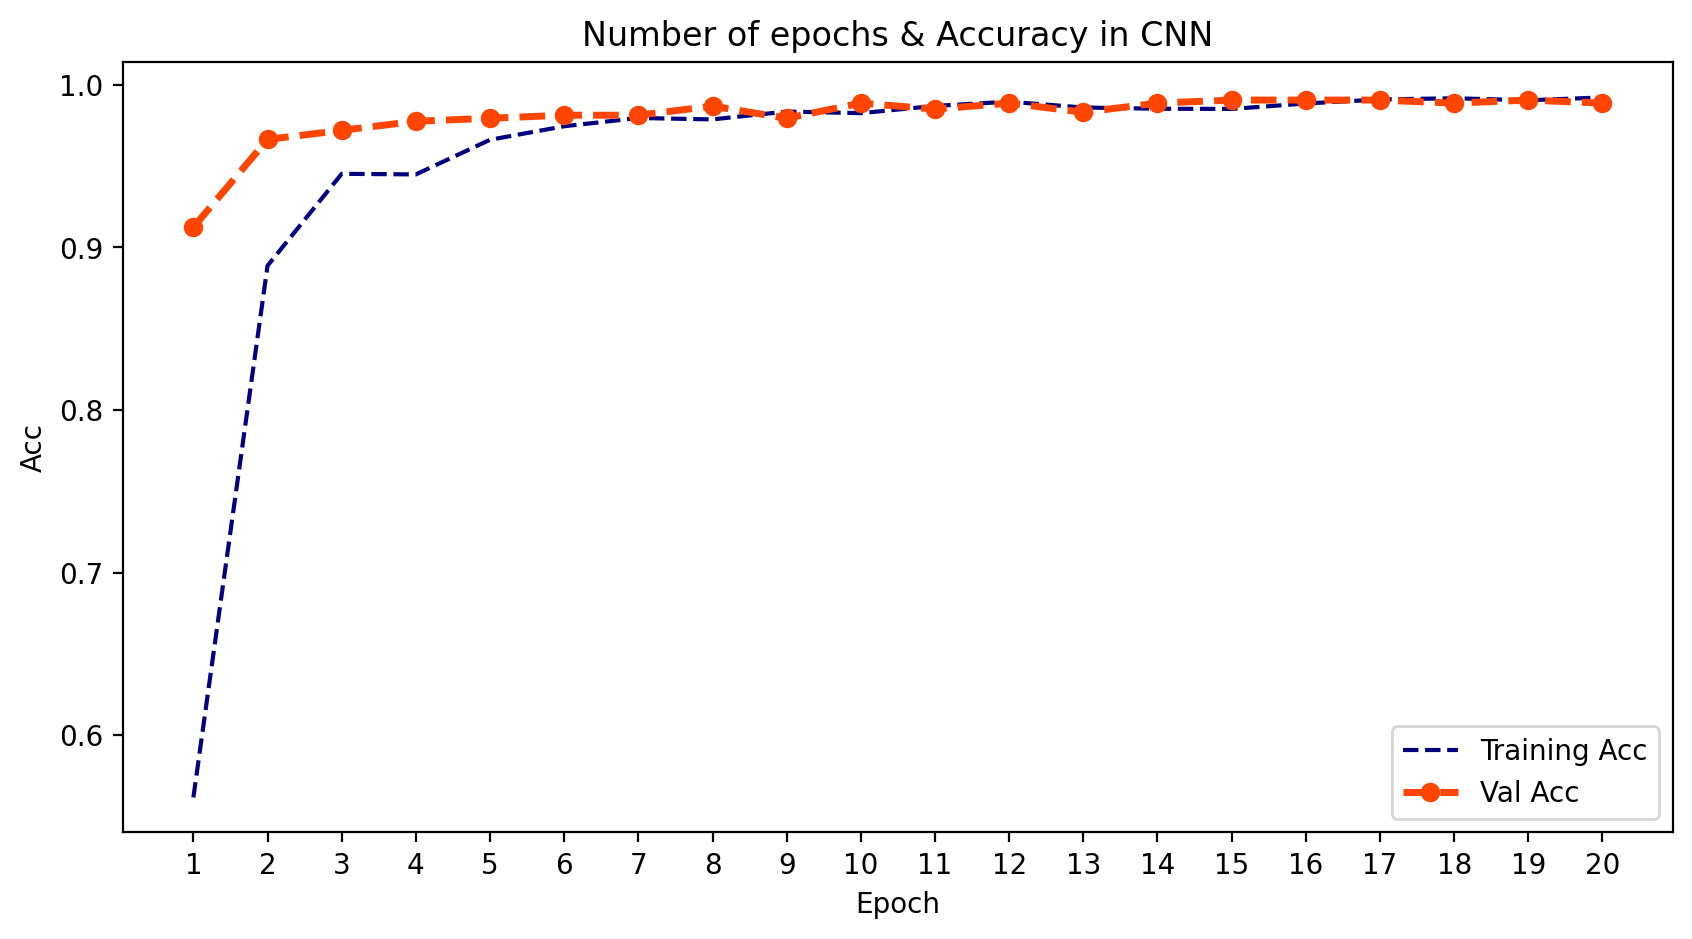

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count2b, training_acc_CNN2, 'r--', color= 'navy')
plt.plot(epoch_count2b, val_acc_CNN2, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in CNN')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();